# BWT - Deep Learning Track
## Task 20
### Adil Mubashir Chaudhry

Topics: 
- Introduction to Keras
- Example Projects on Classification and Regression

In this notebook we will get started with using neural networks to solve real world problems by working on the 3 most common cases of neural networks
- Classifying Movie Reviews as positive or negative - binary classification
- Classifying newswires by topic - multiclass classification
- Estimating the price of a house given real estate data - scalar regression

We will take a closer look at the core components of neural networks with a quick introduction to Keras, the Python deep-learning library that we will be using.

## Anatomy of Neural Network
Neural networks revolves around the following objects:

- Layers which are combined into a network (or model)
- The input data and corresponding targets
- The loss function which defines the feedback signal that is used for learning
- The optimizer which determine how learning proceeds

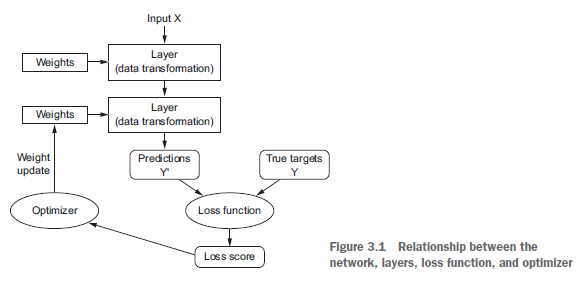


## Layers: Building Blocks of Deep Learning

Fundamental data structure in neural networks. A layer is a data processing module that takes as input one or more tensors and outputs one or more tensors. Different types of layers are appropriate for different types of data. For example

- Simple Vector Data in 2D tensors are often processed by densely or fully connected layers
- Sequence Data stored in 3D tensors are usually processed by recurrent layers such as LSTM
- Image data stored in 4D tensors are processed by 2D convolution Layers (Conv2D)

Layer compatibility is also another major part of layers. This refers to a layers ability to only accept certain shape or data and only output a certain shape of data. Creating a layer example

from keras import models, layers

model = models.Sequential()

model.add(layers.Dense(32, input_shape=(784,)))



## Models: A network of layers

Most common instance of models are linear stack oflayers where single input is mapped to a single output but there is a much larger variety of network topologies. Some of which are:
- Two-branch networks
- multihead networks
- Inception Blocks


## Loss Functions and Optimizers: Keys to configuring the Learning Process

- Loss function : The qunatity that will be minized during training. It represents a measure of success for the task at hand
- Optimizer: Determines how the network will be updated based on loss function. It implements specific variant of stochastic gradient descent (SGD)

Choosing the right loss (objective) function for your problenm is key to your networks trianing process. Fortunately for common problems such as classification, regression and sequence predictions there are somple guidelines you can follow to choose the correct loss function. For example:

- Binary Crossentropy for two-class classification
- Categorical Crossentropy for many-class classification
- mean-squared error for regression problems
- connectionaist temporal classification (CTC) for a sequence-learning problem

its only when youre working on research problems where you will have a need to develop your own loss functions.


# Introduction to Keras

Keras is a deep-learning framework for Python that provices a convenient way to define and train almost any kind of deep-learning model. Keras has the following key features:
- Allows same code to run seamlessly on CPU and GPU
- It has a user-friendly API that mekes it east to quickly prototype deep-learning models
- It has built-in support for many different networks such as Conv2D and recurrent networks or any combination of both
- It supports arbitrary network architectures

Keras is distributes under the permissive MIT license which means it can be used in commercial projects.



## Developing with Keras
The typical Keras workflow looks like:
- Define you training data
- Define a network of layers
- Configure learning process by choosing loss function and optimizer
- Iterate on your training data

# Classifying Movie Review : A Binary Classification Example

Two-Class classification or binary classification is the most widely applied kind of machine learning problem. In this example we will be classifying moview reviews as positive or negative based on the text content of the review.

We will be using the IMDB dataset which is a set of 50,000 highly polatized reviews from the Internet Movie Database

In [34]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

the num_words argument above makes sure that only the 10000 most frequent words in the dataset are used to make the vector data of a manageable size

In [35]:
import numpy as np

In [36]:
def vectorize_sequence(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [37]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [38]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [39]:
from keras import models
from keras import layers

In [40]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='relu'))

In [41]:
from keras import optimizers
from keras import metrics
from keras import losses

In [42]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
            loss=losses.binary_crossentropy,
            metrics=[metrics.binary_accuracy])

In [43]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [44]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.6736 - binary_accuracy: 0.7195 - val_loss: 0.4302 - val_binary_accuracy: 0.8460
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3609 - binary_accuracy: 0.8859 - val_loss: 0.4285 - val_binary_accuracy: 0.8717
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2723 - binary_accuracy: 0.9236 - val_loss: 0.7093 - val_binary_accuracy: 0.8568
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2374 - binary_accuracy: 0.9366 - val_loss: 0.5261 - val_binary_accuracy: 0.8793
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1917 - binary_accuracy: 0.9551 - val_loss: 0.5758 - val_binary_accuracy: 0.8777
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1618 - binary_accuracy: 0.9643 - val_loss: 0.7539 - val_binary_accuracy: 0.8693
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - los

In [45]:
import matplotlib.pyplot as plt

In [46]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

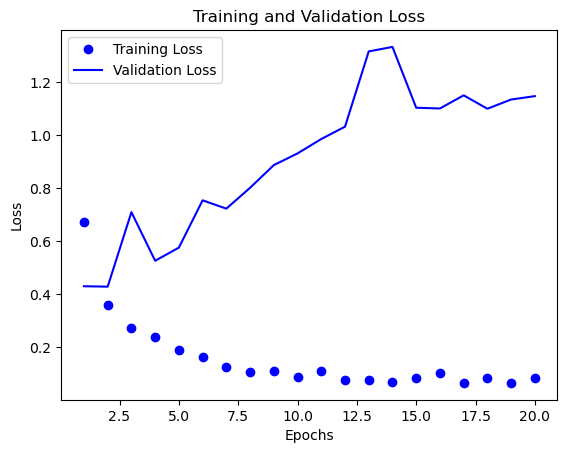

In [47]:
loss_value = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_value, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

as we can see in the above plot the training loss decreases over time but the validation loss increases with each epoch. This is a case of overfitting where the model is performing well on the data that it is trained on but does not perform well on unseen data. Lets retrain the model to see how the performance changes

In [48]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001),
            loss=losses.binary_crossentropy,
            metrics=[metrics.binary_accuracy])


history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.6790 - binary_accuracy: 0.5488 - val_loss: 0.6609 - val_binary_accuracy: 0.6172
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.6427 - binary_accuracy: 0.6485 - val_loss: 0.6272 - val_binary_accuracy: 0.6782
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.6053 - binary_accuracy: 0.7224 - val_loss: 0.5939 - val_binary_accuracy: 0.7496
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.5688 - binary_accuracy: 0.7808 - val_loss: 0.5624 - val_binary_accuracy: 0.7757
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.5342 - binary_accuracy: 0.8216 - val_loss: 0.5325 - val_binary_accuracy: 0.7972
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.5008 - binary_accuracy: 0.8447 - val_loss: 0.5043 - val_binary_accuracy: 0.8342
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - los

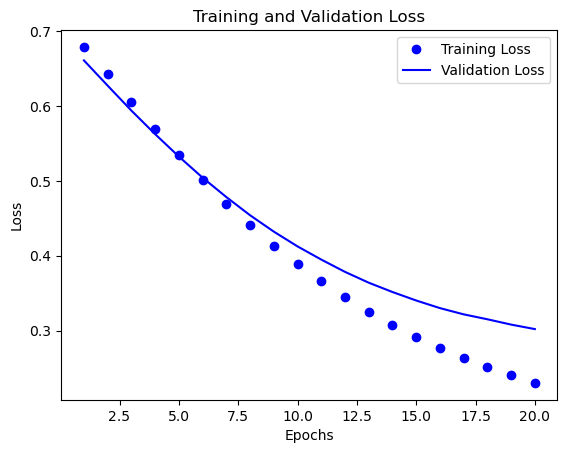

In [49]:
history_dict = history.history
loss_value = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['binary_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_value, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [50]:
plt.clf()


<Figure size 640x480 with 0 Axes>

decreasing the learning rate and changing the final output layer activation function to the sigmoid function has resulted in the validation loss being decreaed after each epoch. Further tuning our model and its parameters will result in even higher accuracy

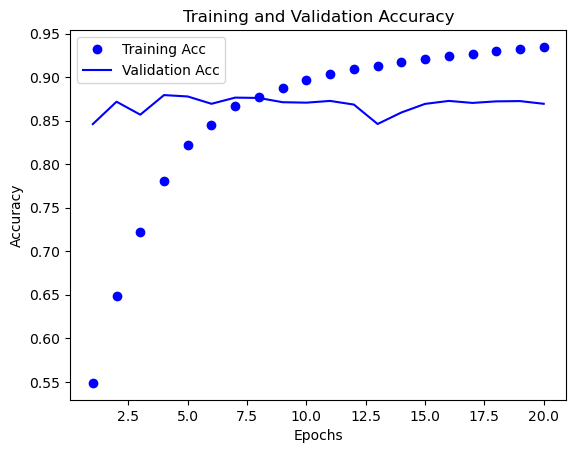

In [51]:
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Classifying Newswires: A multiclass Classification Example

We will be working on the Reuters dataset which is a set of short newswires and their topics published by the reuters in 1986. There are 46 different topics and atleast 10 examples for each topic in the training set

In [62]:
from keras.datasets import reuters


(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 1s 0us/step


In [63]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [64]:
def to_one_hot(labels, dimensions=46):
    results = np.zeros((len(labels), dimensions))
    for i, label in enumerate(labels):
        results[i,label]=1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

the above function can be implemented using keras in the following manner

In [65]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [66]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [67]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
             metrics=['accuracy'])

In [68]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [69]:
history = model.fit(partial_x_train, partial_y_train, epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 31ms/step - loss: 2.6933 - accuracy: 0.5222 - val_loss: 1.8237 - val_accuracy: 0.6360
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 1.5165 - accuracy: 0.6858 - val_loss: 1.3638 - val_accuracy: 0.6990
Epoch 3/20
16/16 [==============================] - 0s 21ms/step - loss: 1.1701 - accuracy: 0.7448 - val_loss: 1.2071 - val_accuracy: 0.7400
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.9637 - accuracy: 0.7980 - val_loss: 1.0883 - val_accuracy: 0.7700
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.8073 - accuracy: 0.8261 - val_loss: 1.0357 - val_accuracy: 0.7760
Epoch 6/20
16/16 [==============================] - 0s 23ms/step - loss: 0.6766 - accuracy: 0.8554 - val_loss: 0.9656 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5696 - accuracy: 0.8796 - val_loss: 0.9416 - val_accuracy: 0.8030
Epoch 8/20
16

In [71]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

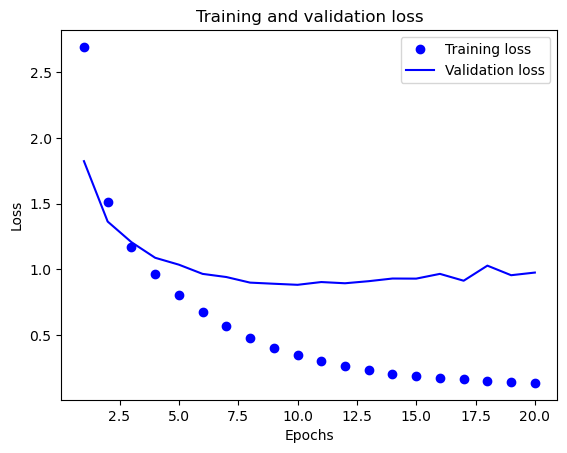

In [72]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

the model overfits after 9 epochs so we will make a new model that trains until 9 epochs

In [73]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 30ms/step - loss: 2.6689 - accuracy: 0.4872 - val_loss: 1.8487 - val_accuracy: 0.5950
Epoch 2/9
16/16 [==============================] - 0s 19ms/step - loss: 1.5680 - accuracy: 0.6624 - val_loss: 1.4179 - val_accuracy: 0.6900
Epoch 3/9
16/16 [==============================] - 0s 19ms/step - loss: 1.2224 - accuracy: 0.7330 - val_loss: 1.2272 - val_accuracy: 0.7250
Epoch 4/9
16/16 [==============================] - 0s 20ms/step - loss: 1.0074 - accuracy: 0.7871 - val_loss: 1.1059 - val_accuracy: 0.7610
Epoch 5/9
16/16 [==============================] - 0s 22ms/step - loss: 0.8480 - accuracy: 0.8213 - val_loss: 1.0171 - val_accuracy: 0.7920
Epoch 6/9
16/16 [==============================] - 0s 19ms/step - loss: 0.7113 - accuracy: 0.8492 - val_loss: 0.9667 - val_accuracy: 0.7910
Epoch 7/9
16/16 [==============================] - 0s 19ms/step - loss: 0.5972 - accuracy: 0.8723 - val_loss: 0.9223 - val_accuracy: 0.8080
Epoch 8/9
16/16 [===

In [74]:
results

[0.9598372578620911, 0.7764915227890015]

# Predicting House Prices: A Regression Example

We will be using the boston housing price dataset to predict the median price of homes in a given Boston Suburb.

In [76]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_target) = boston_housing.load_data()

57026/57026 [==============================] - 0s 4us/step


In [78]:
train_data.shape

(404, 13)

In [79]:
test_data.shape

(102, 13)

It would be problematic to feed into a neural network values that all take wildly different
ranges. The network might be able to automatically adapt to such heterogeneous
data, but it would definitely make learning more difficult. A widespread best practice
to deal with such data is to do feature-wise normalization

In [80]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [81]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [82]:
import numpy as np

In [83]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
        epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
